<a href="https://colab.research.google.com/github/AnnaGipich/Portfolio-python/blob/main/bank_clients_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Интенсив zero/bank_clients_transactions.csv')

In [ ]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [ ]:
df.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

In [ ]:
print(df.dtypes)
print("\nПервые строки DataFrame:")

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

Первые строки DataFrame:


In [ ]:
print(df.head())

  TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053     10/1/94          F   JAMSHEDPUR   
1            T2   C2142763      4/4/57          M      JHAJJAR   
2            T3   C4417068    26/11/96          F       MUMBAI   
3            T4   C5342380     14/9/73          F       MUMBAI   
4            T5   C9031234     24/3/88          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05          2/8/16           143207   
1             2270.69          2/8/16           141858   
2            17874.44          2/8/16           142712   
3           866503.21          2/8/16           142714   
4             6714.43          2/8/16           181156   

   TransactionAmount (INR)  
0                     25.0  
1                  27999.0  
2                    459.0  
3                   2060.0  
4                   1762.5  


In [ ]:
# Приведение дат к формату datetime с указанием формата MM/DD/YY
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], format='%m/%d/%y', errors='coerce')
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%m/%d/%y', errors='coerce')

# Проверка результата
print("Типы данных после преобразования:")
print(df.dtypes)
print("\nПервые строки DataFrame:")
print(df[['CustomerDOB', 'TransactionDate']].head())


Типы данных после преобразования:
TransactionID                      object
CustomerID                         object
CustomerDOB                datetime64[ns]
CustGender                         object
CustLocation                       object
CustAccountBalance                float64
TransactionDate            datetime64[ns]
TransactionTime                     int64
TransactionAmount (INR)           float64
dtype: object

Первые строки DataFrame:
  CustomerDOB TransactionDate
0  1994-10-01      2016-02-08
1  2057-04-04      2016-02-08
2         NaT      2016-02-08
3         NaT      2016-02-08
4         NaT      2016-02-08


In [ ]:
# Удаление дублей
df = df.drop_duplicates()

In [ ]:
print(f"Количество дублей после удаления: {df.duplicated().sum()}")

Количество дублей после удаления: 0


In [ ]:
df = df.dropna()

In [ ]:
print(f"Количество пропусков после удаления: {df.isnull().sum().sum()}")

Количество пропусков после удаления: 0


**Определяем количество уникальных клиентов**

In [ ]:
num_customers = df['CustomerID'].dropna().nunique()
print(f"Количество уникальных клиентов (без пропусков): {num_customers}")


Количество уникальных клиентов (без пропусков): 879358


# Вывод

Количество уникальных клиентов : **879 358**

In [ ]:


# Определяем период
start_date = '2016-01-01'  # Начало периода
end_date = '2016-12-31'    # Конец периода

# Фильтруем данные по периоду
filtered_df = df[(df['TransactionDate'] >= start_date) & (df['TransactionDate'] <= end_date)]

# Подсчёт уникальных клиентов
unique_customers = filtered_df['CustomerID'].nunique()

# Вывод результата
print(f"Количество уникальных клиентов за период с {start_date} по {end_date}: {unique_customers}")


Количество уникальных клиентов за период с 2016-01-01 по 2016-12-31: 879358


**Общее количество транзакций**

In [ ]:
# Подсчёт общего количества транзакций
total_transactions = df.shape[0]

# Вывод результата
print(f"Общее количество транзакций: {total_transactions}")


Общее количество транзакций: 1041614


# Вывод
Общее количество транзакций: **1041614**.
Такое количество транзакций может свидетельствовать о крупномасштабной и интенсивной деятельности компании в сфере банковского дела или электронных платежей.

**Клиентская база, проработка**

In [ ]:
transactions_per_customer = total_transactions / unique_customers
print(f"Среднее количество транзакций на клиента: {transactions_per_customer:.2f}")


Среднее количество транзакций на клиента: 1.18


Среднее количество транзакций на клиента 1.18 может говорить о том, что большинство клиентов совершают лишь одну или чуть более одной транзакции за год. Этот показатель может быть важным индикатором для анализа клиентской базы.


**Анализ распределения**

In [ ]:
transactions_per_customer = df.groupby('CustomerID')['TransactionID'].count()
print(transactions_per_customer.describe())


count    212714.000000
mean          1.037783
std           0.196165
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: TransactionID, dtype: float64


# Вывод
**Преобладание одноразовых транзакций**:

75% клиентов совершили только одну транзакцию, что подтверждает гипотезу о низкой лояльности большинства клиентов. Это может быть связано с тем, что многие клиенты совершают транзакции по необходимости, а не в рамках постоянных отношений с бизнесом.

**Одинокие активные клиенты:**

25% клиентов, вероятно, совершают больше, чем одну транзакцию. Это может быть группа более лояльных клиентов, с которыми нужно работать на уровне персонализированного маркетинга.
**Есть клиенты, совершившие до 6 транзакций**:

Максимальное количество транзакций на клиента — 6. Это более активные клиенты, которые могут составлять основу бизнеса. Эти клиенты могут иметь большой потенциал для дополнительной сегментации и работы над повышением их лояльности.

В дальнейшем рекомендуется провести сегментацию клиентов по количеству тразакций.

**Распределение баланса клиентов**

In [ ]:
print(df['TransactionAmount (INR)'].describe())


count    220751.000000
mean       1474.971961
std        5873.718438
min           0.000000
25%         156.000000
50%         440.000000
75%        1143.790000
max      724122.000000
Name: TransactionAmount (INR), dtype: float64


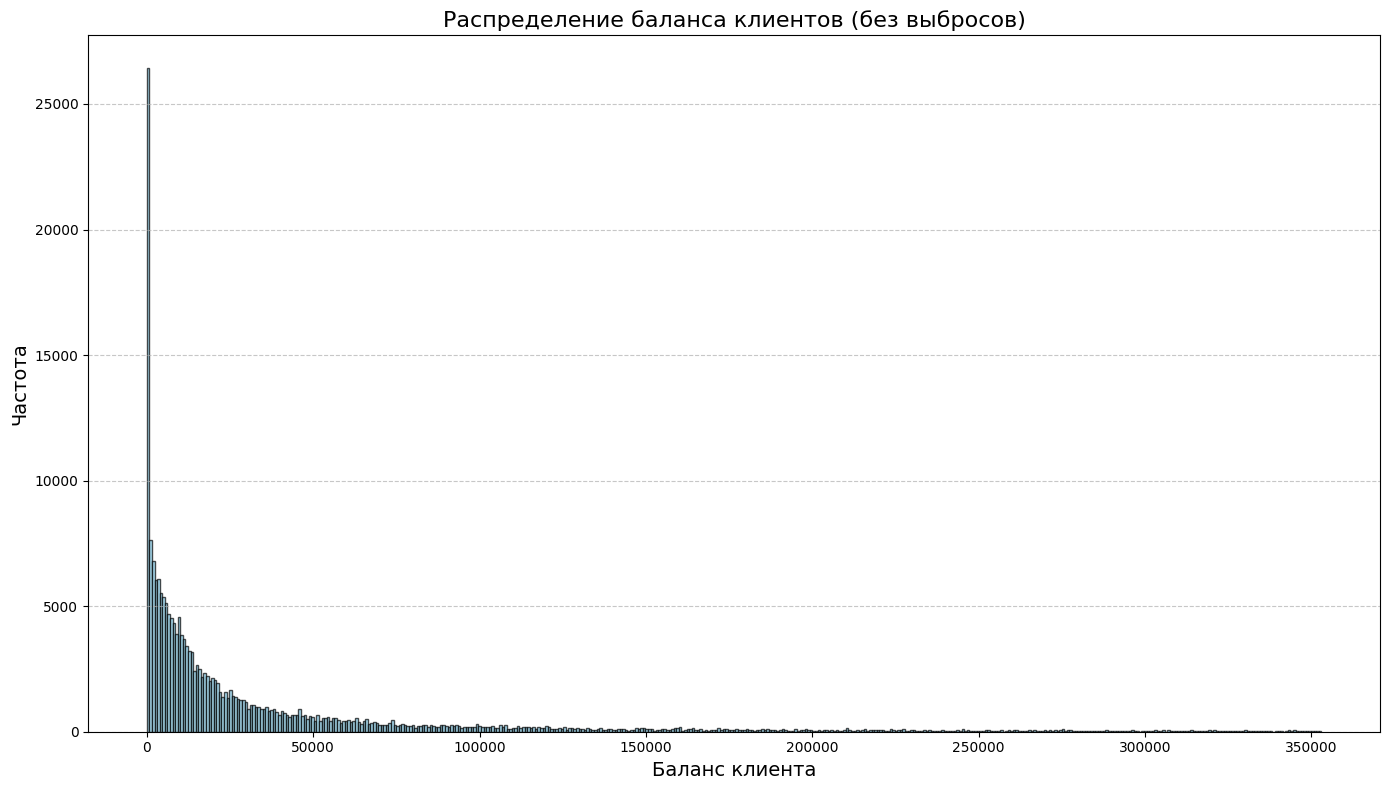

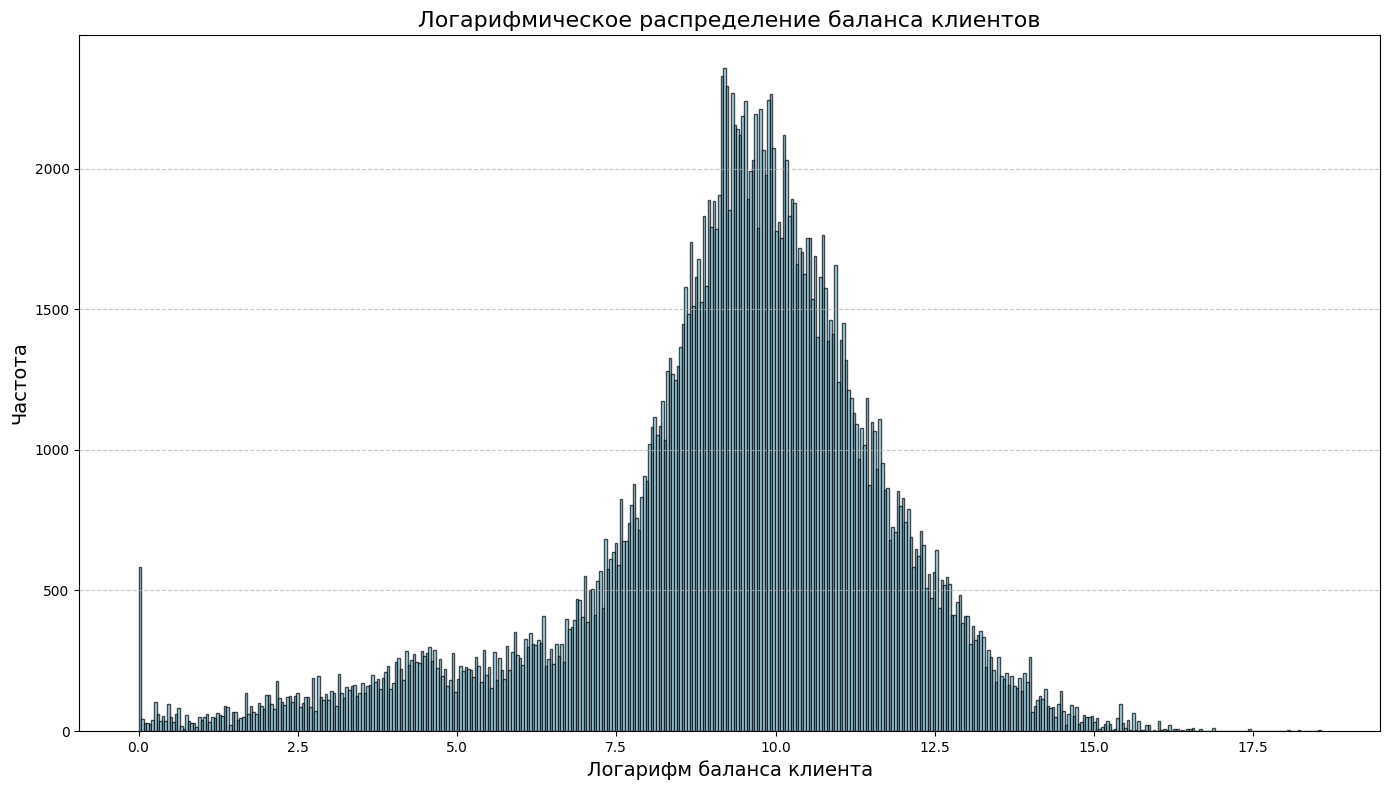

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Фильтрация данных для исключения выбросов
filtered_balance = df['CustAccountBalance'][df['CustAccountBalance'] <= df['CustAccountBalance'].quantile(0.95)]

# Оценка оптимального количества корзин
n_data_points = len(filtered_balance)
optimal_bins = int(np.sqrt(n_data_points))

# Построение гистограммы
plt.figure(figsize=(14, 8))
plt.hist(filtered_balance, bins=optimal_bins, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Распределение баланса клиентов (без выбросов)', fontsize=16)
plt.xlabel('Баланс клиента', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Применение логарифма (для сравнения)
log_balance = np.log1p(df['CustAccountBalance'])  # log(1 + x) для учета нулей
plt.figure(figsize=(14, 8))
plt.hist(log_balance, bins=optimal_bins, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Логарифмическое распределение баланса клиентов', fontsize=16)
plt.xlabel('Логарифм баланса клиента', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Вывод
Пик активности в районе 10 (максимум):

Клиенты с балансом около этой величины составляют самую крупную группу.
Это может указывать на то, что основная клиентская база находится в среднем уровне доходов или активов.
Рост до пика (от 7.5 до 10):

Постепенный рост говорит о том, что клиентская база расширяется с увеличением среднего баланса.
Это может указывать на то, что для этой категории клиентов  услуга наиболее привлекательны.
Снижение после 12 до 14:

Уменьшение числа клиентов в диапазоне более высоких значений может свидетельствовать:
О сегментации аудитории: Клиенты с более высоким балансом редки и, возможно, относятся к премиальному сегменту.
О рыночных ограничениях: Продукт может быть менее привлекателен для этой категории из-за высокой стоимости или отсутствия дополнительных услуг.
Общая тенденция:

Пик и спад указывают на то, что продукт или услуга в большей степени ориентированы на массового потребителя, а не на премиальный сегмент.


**Построение гистограммы распределение суммы транзакций**

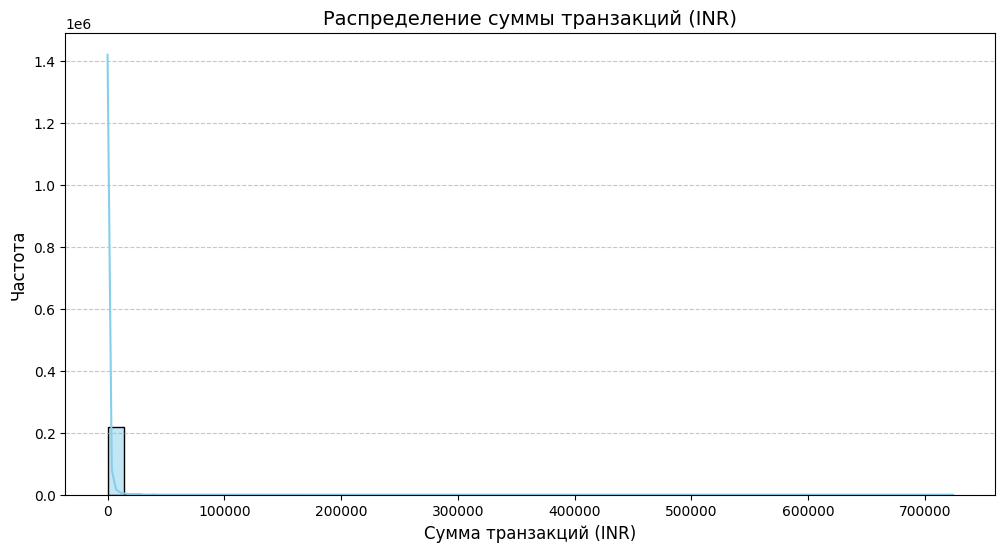

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Исключаем нулевые значения транзакций, если они неинтересны для анализа
non_zero_transactions = df[df['TransactionAmount (INR)'] > 0]

# Определяем оптимальное количество корзин для гистограммы
optimal_bins = 50  # Это значение можно менять в зависимости от распределения

# Построение гистограммы
plt.figure(figsize=(12, 6))
sns.histplot(non_zero_transactions['TransactionAmount (INR)'], bins=optimal_bins, kde=True, color='skyblue')
plt.title('Распределение суммы транзакций (INR)', fontsize=14)
plt.xlabel('Сумма транзакций (INR)', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Дополнительный график без выбросов

<Axes: xlabel='TransactionAmount (INR)', ylabel='Count'>

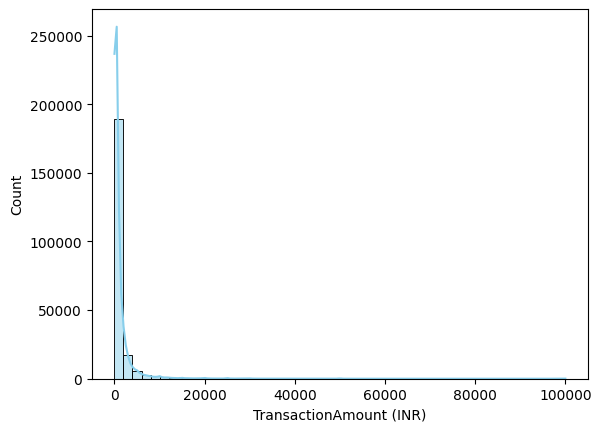

In [ ]:
trimmed_data = non_zero_transactions[non_zero_transactions['TransactionAmount (INR)'] < 100000]
sns.histplot(trimmed_data['TransactionAmount (INR)'], bins=optimal_bins, kde=True, color='skyblue')


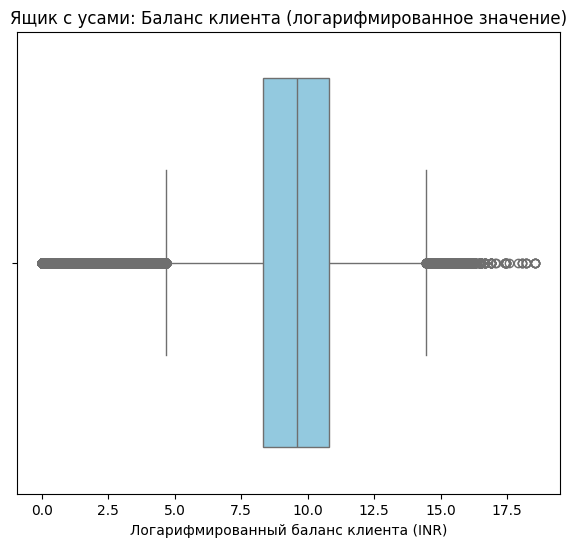

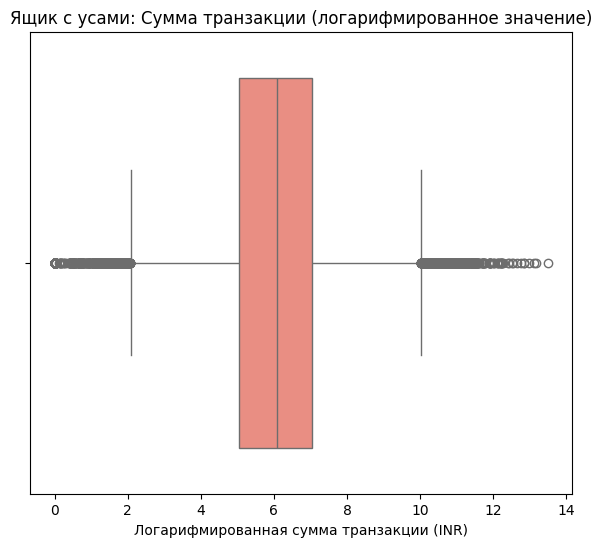

In [ ]:
# Логарифмическая шкала для баланса клиента
plt.figure(figsize=(7, 6))
sns.boxplot(x=np.log1p(df['CustAccountBalance']), color='skyblue')
plt.title('Ящик с усами: Баланс клиента (логарифмированное значение)')
plt.xlabel('Логарифмированный баланс клиента (INR)')
plt.show()

# Логарифмическая шкала для суммы транзакции
plt.figure(figsize=(7, 6))
sns.boxplot(x=np.log1p(df['TransactionAmount (INR)']), color='salmon')
plt.title('Ящик с усами: Сумма транзакции (логарифмированное значение)')
plt.xlabel('Логарифмированная сумма транзакции (INR)')
plt.show()


**Анализ возраста клиентов.**

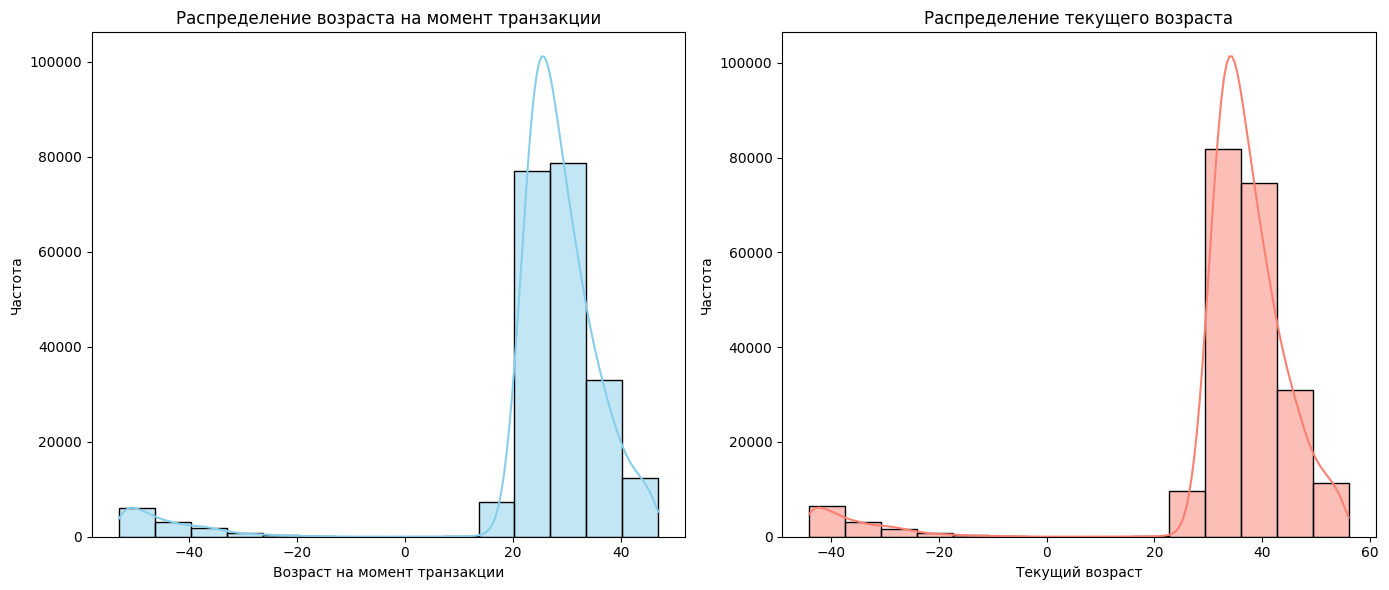

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Преобразуем столбец с датой рождения в datetime, если он не в таком формате
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], errors='coerce')
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')

# Рассчитаем возраст на момент транзакции
df['AgeAtTransaction'] = (df['TransactionDate'] - df['CustomerDOB']).dt.days // 365

# Рассчитаем текущий возраст
current_date = datetime.today()
df['CurrentAge'] = (current_date - df['CustomerDOB']).dt.days // 365

# Визуализируем распределение возрастов с помощью гистограмм

plt.figure(figsize=(14, 6))

# Гистограмма для возраста на момент транзакции
plt.subplot(1, 2, 1)
sns.histplot(df['AgeAtTransaction'], bins=15, kde=True, color='skyblue')
plt.title('Распределение возраста на момент транзакции')
plt.xlabel('Возраст на момент транзакции')
plt.ylabel('Частота')

# Гистограмма для текущего возраста
plt.subplot(1, 2, 2)
sns.histplot(df['CurrentAge'], bins=15, kde=True, color='salmon')
plt.title('Распределение текущего возраста')
plt.xlabel('Текущий возраст')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()


In [ ]:
# Удалим выбросы (значения < 0 и > 100 лет)
df_cleaned = df[(df['AgeAtTransaction'] >= 0) & (df['AgeAtTransaction'] <= 100)].copy()

# Функция для определения возрастной группы
def age_group(age):
    if age <= 18:
        return '0-18 лет'
    elif age <= 35:
        return '19-35 лет'
    elif age <= 50:
        return '36-50 лет'
    elif age <= 65:
        return '51-65 лет'
    else:
        return '66+ лет'

# Применяем функцию для создания возрастной группы с использованием .loc
df_cleaned.loc[:, 'AgeGroupAtTransaction'] = df_cleaned['AgeAtTransaction'].apply(age_group)
df_cleaned.loc[:, 'AgeGroupCurrent'] = df_cleaned['CurrentAge'].apply(age_group)

# Смотрим распределение возрастных групп
age_group_distribution = df_cleaned['AgeGroupAtTransaction'].value_counts()
print(age_group_distribution)

# Статистика по возрастным группам на момент транзакции
age_group_distribution_current = df_cleaned['AgeGroupCurrent'].value_counts()
print(age_group_distribution_current)


AgeGroupAtTransaction
19-35 лет    174327
36-50 лет     32771
0-18 лет       1362
Name: count, dtype: int64
AgeGroupCurrent
36-50 лет    108036
19-35 лет     91395
51-65 лет      8977
0-18 лет         52
Name: count, dtype: int64


# Вывод



1.   Возрастная группа 19-35 лет является наиболее активной в контексте совершения транзакций, что может быть связано с финансовой активностью молодежи и молодых профессионалов.
2.   Возрастная группа 36-50 лет в контексте текущего возраста находит большую численность, что может свидетельствовать о том, что эта группа сохраняет высокую активность по мере взросления.


3.   0-18 лет имеют низкую активность как на момент транзакции, так и на текущий момент, что логично, так как они имеют меньше возможностей совершать транзакции.
4.   51-65 лет - это небольшая группа в контексте текущего возраста, что может говорить о менее активных клиентах в этом возрасте.

**Рекомендации**
Возможно, стоит уделить больше внимания клиентам в возрасте 19-35 лет, поскольку они составляют основную аудиторию.
В возрасте 36-50 лет могут быть клиенты с большими потребностями в сервисах и продуктах, поэтому стоит сосредоточиться на этой группе для повышения лояльности.
Разработать стратегию для привлечения более молодой аудитории (0-18 лет), возможно, через партнерства с родителями или предложениями, ориентированными на обучение и финансовую грамотность.





**Изучение пола клиентов**

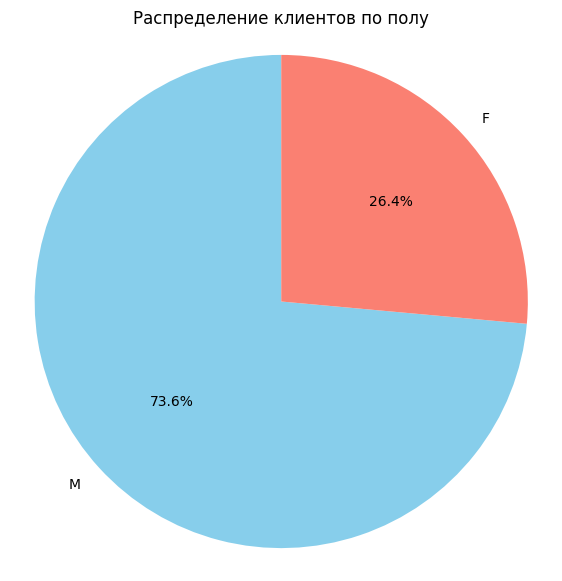

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Предполагаем, что столбец 'CustGender' содержит информацию о поле клиентов
# Создаем распределение по полу
gender_distribution = df['CustGender'].value_counts()

# Создаем круговую диаграмму
plt.figure(figsize=(7, 7))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Распределение клиентов по полу')
plt.axis('equal')  # Для круга
plt.show()


# Вывод
- **Мужчины** (73%) составляют большую часть клиентской базы. Это может говорить о том, что ваш продукт или услуга больше востребованы среди мужчин. Возможные причины:

Продукт ориентирован на мужскую аудиторию (например, технические устройства, финансовые услуги и т.д.).
- **Женщины** могут быть менее активны в использовании услуги по ряду причин (например, маркетинг недостаточно привлекателен для женской аудитории).
Женщины (27%) составляют меньшинство, что может указывать на необходимость усиления внимания к этой группе.

Проведение **анализа** **сочетания** **возраста** и **пола**. Это позволит увидеть, какие возрастные группы наиболее активны среди мужчин и женщин, а также сравнить их между собой.

In [ ]:
# Группировка по возрастным группам и полу
gender_age_distribution = df_cleaned.groupby(['AgeGroupAtTransaction', 'CustGender']).size().unstack()

print(gender_age_distribution)


CustGender                 F       M
AgeGroupAtTransaction               
0-18 лет                 381     981
19-35 лет              47348  126979
36-50 лет               7345   25426


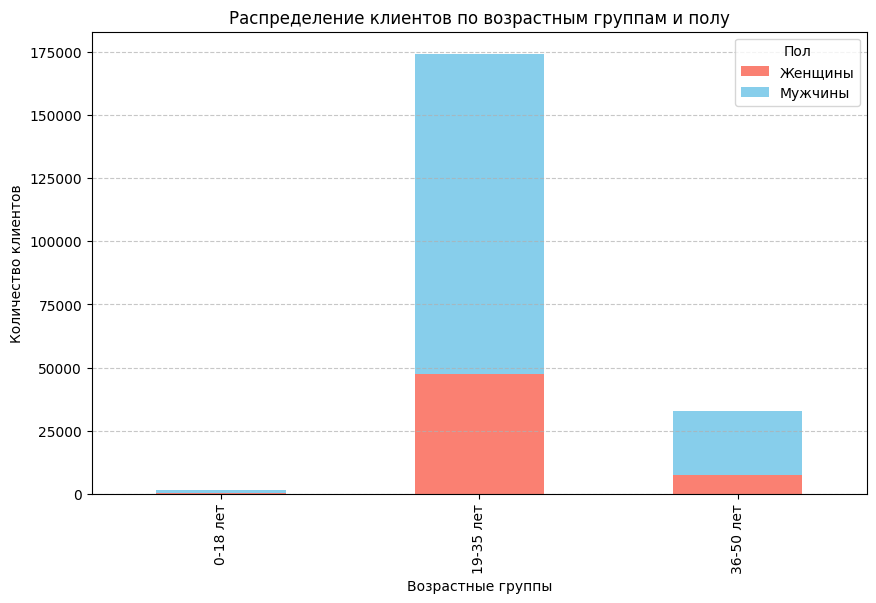

In [ ]:
# Столбчатая диаграмма
gender_age_distribution.plot(kind='bar', figsize=(10, 6), stacked=True, color=['salmon', 'skyblue'])
plt.title('Распределение клиентов по возрастным группам и полу')
plt.xlabel('Возрастные группы')
plt.ylabel('Количество клиентов')
plt.legend(title='Пол', labels=['Женщины', 'Мужчины'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Вывод

**Возрастная группа 19–35 лет**:

Мужчины доминируют в этой группе, это указывает на сильный спрос среди молодых мужчин.
Женщин в этой группе меньше, нужно рассмотреть причины ,  почему услуги или маркетинг не так привлекает молодую женскую аудиторию.

**Возрастная группа 36–50 лет:**

Если разрыв между полами велик, стоит понять, чем обусловлено это различие.

**Пожилые (51+ лет):**

 **Аудитория старше 51** года практически отсутствует среди женщин или мужчин, возможно, продукт не рассчитан на эту категорию.

**Анализ места проживания**

**топ-10 городов**

In [ ]:
import pandas as pd


# Подсчитаем количество уникальных клиентов в каждом городе
city_customer_counts = df.groupby('CustLocation')['TransactionID'].count().sort_values(ascending=False)


# Возьмем топ-10 городов
top_cities = city_customer_counts.head(10)

# Выведем результат
print(top_cities)


CustLocation
MUMBAI       21209
BANGALORE    17307
NEW DELHI    17090
GURGAON      16063
DELHI        14729
NOIDA         7321
CHENNAI       6080
PUNE          5587
HYDERABAD     4788
THANE         4576
Name: TransactionID, dtype: int64


<Axes: xlabel='CustLocation'>

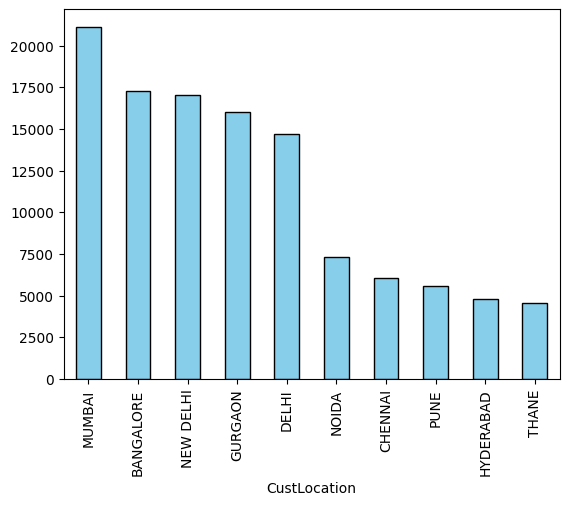

In [ ]:
top_cities.plot(kind='bar', color='skyblue', edgecolor='black')


# Вывод
**Mumbai** как основной рынок:

Этот город доминирует в клиентской базе, что может говорить о высокой популярности услуги в этом регионе.
Рекомендуется сосредоточить маркетинговые усилия и развивать присутствие здесь.
Сильное присутствие в столичном регионе (NCR):

Города **New Delhi, Gurgaon, Noida, и Delhi** вместе представляют значительную долю клиентов.
Возможно, стоит рассмотреть стратегии для более детального анализа этого региона и нацелить кампании на столичный рынок.
Южная и западная Индия:

Города **Bangalore, Chennai, Pune и Hyderabad** показывают хорошую клиентскую базу.
Есть потенциал для увеличения активности в этих регионах.
Thane как растущий рынок:

Несмотря на небольшую клиентскую базу, Thane находится вблизи Mumbai, и этот город может быть рассмотрен как растущий рынок.

**Рекомендации**:

Целевые стратегии для крупнейших городов:

- Разработать уникальные предложения или акции для лидеров, таких как Mumbai, New Delhi, и Bangalore, чтобы укрепить позиции.
Исследование столичного региона NCR:

- Провести детальный анализ поведения клиентов в этих городах (Gurgaon, Delhi, Noida), чтобы лучше понять их потребности.
Оптимизация маркетинга в городах с меньшим числом клиентов:

- Увеличить узнаваемость вашего продукта в городах с меньшей клиентской базой, таких как Pune и Hyderabad.
Рассмотреть возможность регионализации услуг:

- Учитывая, что клиентская база в разных регионах может иметь разные предпочтения, стоит адаптировать услуги или маркетинг под культурные и экономические особенности городов.


**Динамика транзакций по месяцам**

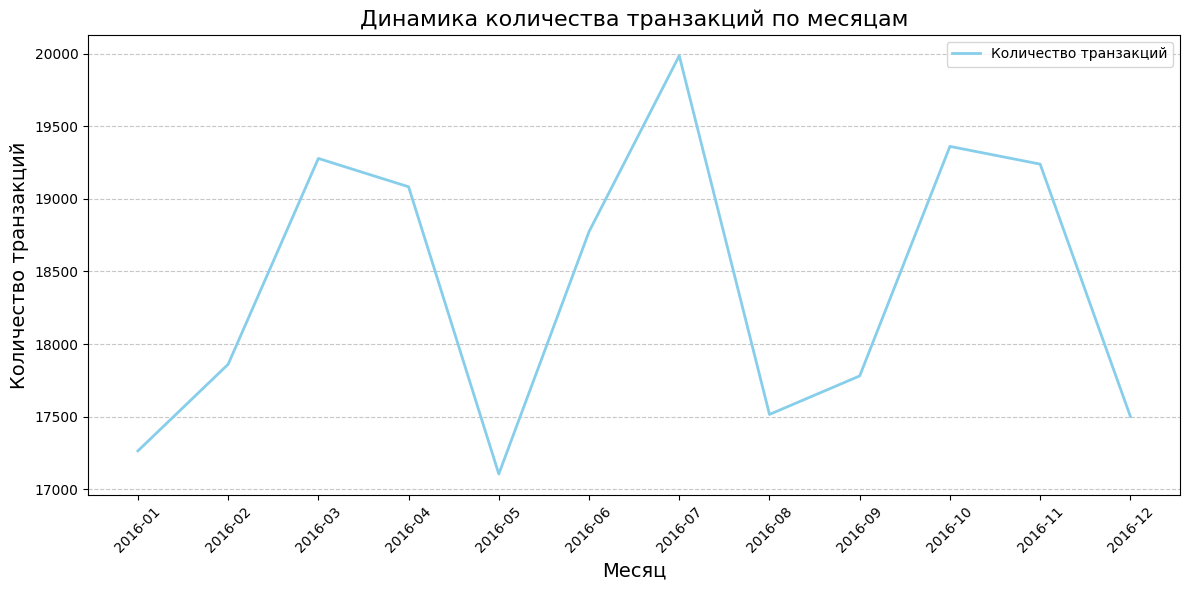

In [ ]:
# Группируем данные по месяцам
monthly_transactions = df.groupby(df['TransactionDate'].dt.to_period('M'))['TransactionID'].count()

# Построение линейного графика
plt.figure(figsize=(12, 6))
plt.plot(monthly_transactions.index.astype(str), monthly_transactions.values, label='Количество транзакций', color='skyblue', linewidth=2)
plt.title('Динамика количества транзакций по месяцам', fontsize=16)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Количество транзакций', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.legend()
plt.show()


# Вывод

**Отсутствие динамики с января по июль**:
Пассивный период: С января по июль транзакции остаются на низком уровне. Это может указывать на период стабилизации, сезонную стагнацию или отсутствие активных маркетинговых кампаний в это время.
Сезонность: Некоторые отрасли показывают снижение активности в первые месяцы года, возможно, это связано с постпраздничным затишьем или неактивным периодом для вашего бизнеса.
Маркетинговые и продажные стратегии: Возможно, в этот период не проводились значительные рекламные акции или улучшения продукта, что могло бы стимулировать транзакции.
2. **Рост с июля по август (пик в августе**):
Запуск нового продукта/услуги: Если в июле начался рост, возможно, в этот момент был запущен новый продукт или услуга, что привлекло клиентов.
Маркетинговая активность: Возможно, в это время была проведена крупная рекламная кампания или специальная акция, которая значительно увеличила количество транзакций.
Сезонные изменения: Август может быть пиковым месяцем из-за сезонных факторов — например, повышение спроса в определенные отрасли в летние месяцы (туризм, электронные товары, образовательные программы).
3. **Спад с сентября по октябрь**:
Завершение акции: Если в августе был пик из-за акций или мероприятий, спад в сентябре-октябре может указывать на завершение этих активностей.

4. **Параллельность графика после октября**:
Стабилизация: После октября динамика стабилизировалась, и график стал параллельным. Это свидетельствует о стабилизации количества транзакций на определенном уровне.

**Анализ успешных месяцев**: Изучите, что происходило в июле-августе, чтобы повторить успешные стратегии или улучшить те области, которые привели к росту. Это может быть связано с продуктом, акциями или маркетинговыми кампаниями.

**Продление активности**: Подумайте, как удержать спрос в сентябре и октябре, возможно, через повторение акций или улучшение предложений.

**Основной вывод**  с июля по август был пиковый рост, а затем наблюдается спад и стабилизация. Это типичная ситуация для бизнеса, который сталкивается с временным увеличением спроса, за которым следует корректировка. Важно извлечь уроки из периода роста и работать над поддержанием или увеличением этого роста в будущем.

**анализ суммы транзакций**

In [ ]:
# Для суммы транзакций
daily_transactions = df.groupby(df['TransactionDate'].dt.date)['TransactionAmount (INR)'].sum()


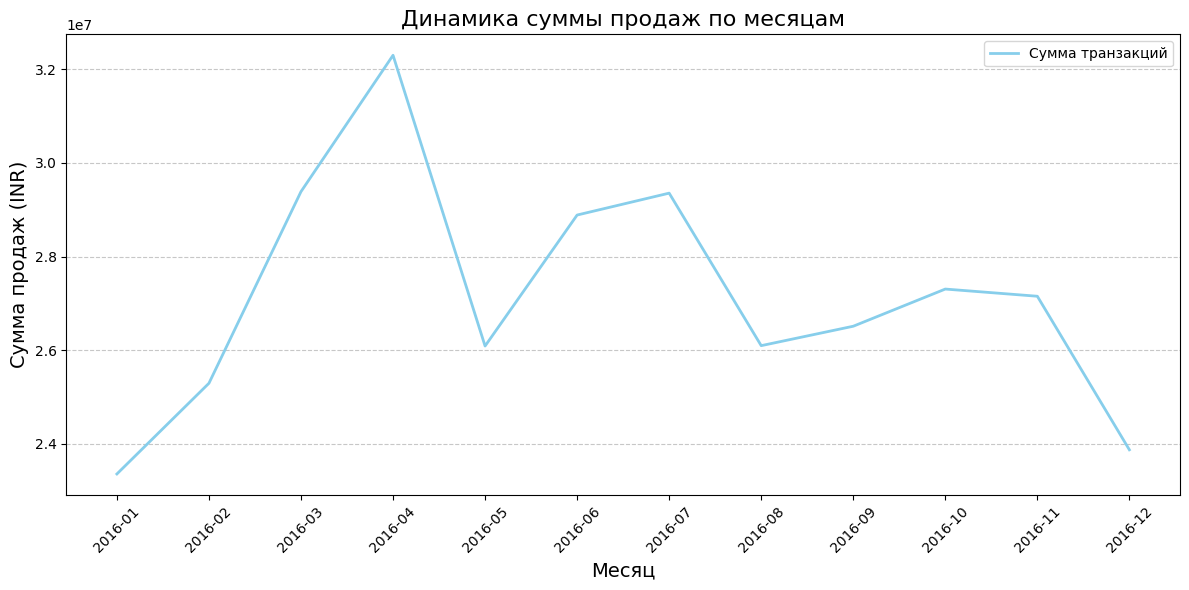

In [ ]:
# Агрегируем данные по месяцам
monthly_sales = df.groupby(df['TransactionDate'].dt.to_period('M'))['TransactionAmount (INR)'].sum()

# Построение графика динамики суммы продаж по месяцам
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, label='Сумма транзакций', color='skyblue', linewidth=2)
plt.title('Динамика суммы продаж по месяцам', fontsize=16)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Сумма продаж (INR)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.legend()
plt.show()


In [ ]:
# Преобразуем столбец TransactionDate в datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Группируем данные по месяцам и считаем сумму транзакций
monthly_sales = df.groupby(df['TransactionDate'].dt.to_period('M'))['TransactionAmount (INR)'].sum()

# Форматируем результат для удобства
monthly_sales = monthly_sales.apply(lambda x: '{:,.0f}'.format(x))

# Выводим результаты
print(monthly_sales)


TransactionDate
2016-01    23,356,831
2016-02    25,293,838
2016-03    29,385,880
2016-04    32,297,876
2016-05    26,088,838
2016-06    28,885,984
2016-07    29,353,602
2016-08    26,096,834
2016-09    26,511,459
2016-10    27,305,426
2016-11    27,151,847
2016-12    23,873,119
Freq: M, Name: TransactionAmount (INR), dtype: object


# Вывод
В августе и сентябре происходит существенный рост продаж, что может быть связано как с сезонными колебаниями, так и с маркетинговыми активностями. Однако после сентября наблюдается спад, что требует дальнейшего анализа для определения причин и возможности использования этих данных для планирования будущих стратегий.

**Анализ распределения транзакций по локациям**

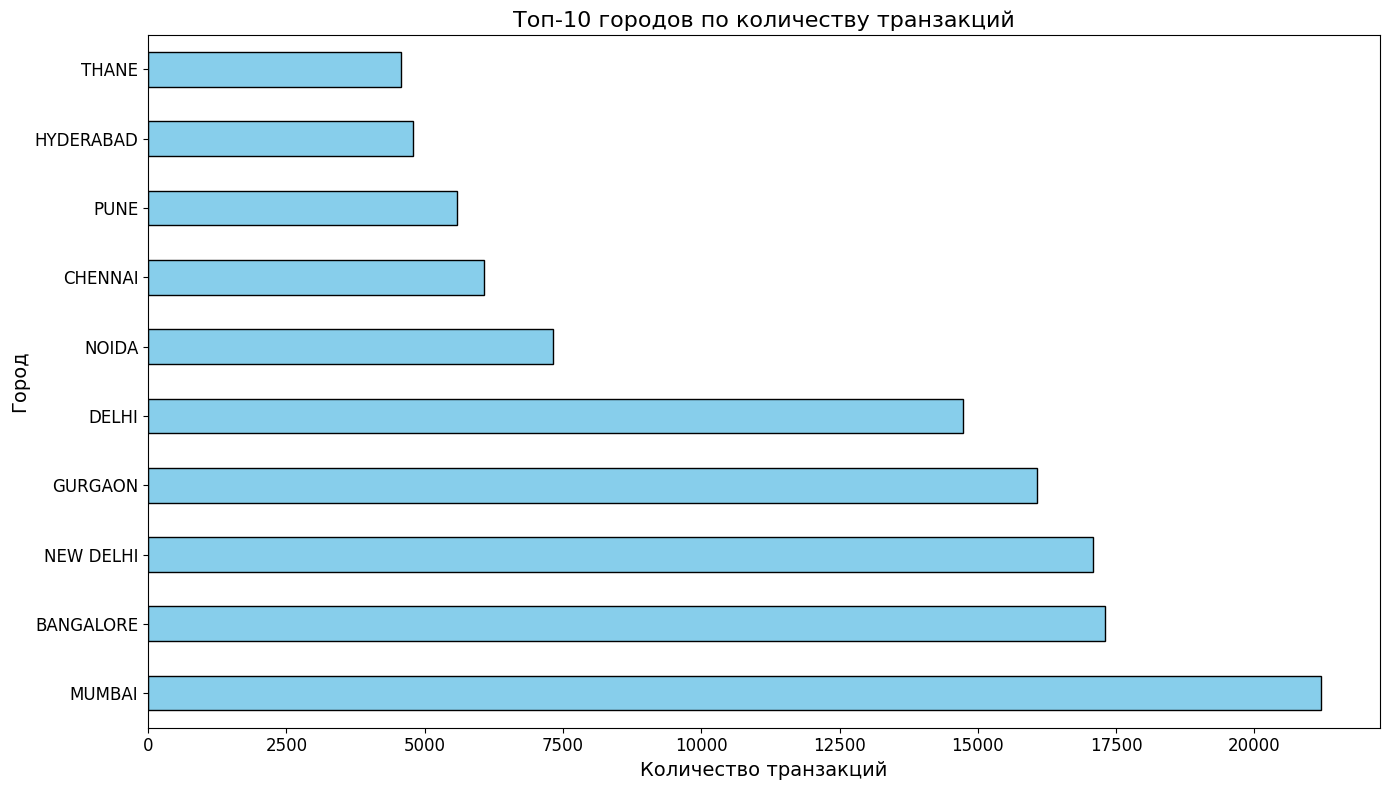

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Группируем данные по городам и считаем количество транзакций для каждого города
city_transaction_count = df.groupby('CustLocation')['TransactionID'].count()

# Ограничим количество городов до 10 наиболее активных
top_cities = city_transaction_count.nlargest(10)

# Построение горизонтальной столбчатой диаграммы для топ-10 городов
plt.figure(figsize=(14, 8))
top_cities.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Топ-10 городов по количеству транзакций', fontsize=16)
plt.xlabel('Количество транзакций', fontsize=14)
plt.ylabel('Город', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


**Распределение времени транзации**

Среднее время транзакции: 2.62 минут


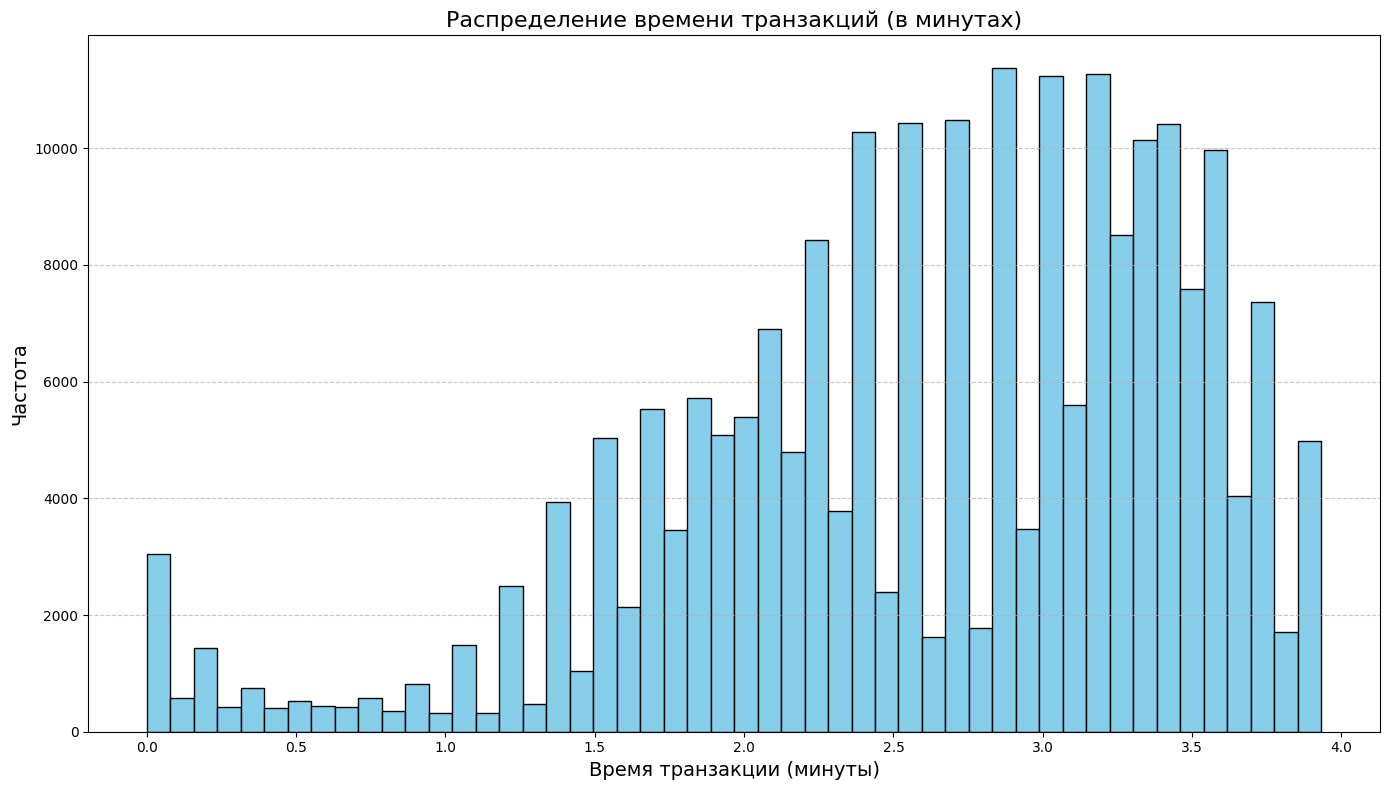

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразуем время транзакции из миллисекунд в минуты
df['TransactionTimeMinutes'] = df['TransactionTime'] / 60000  # 60 000 миллисекунд в 1 минуте

# Рассчитаем среднее время транзакции
average_time = df['TransactionTimeMinutes'].mean()
print(f"Среднее время транзакции: {average_time:.2f} минут")

# Построим гистограмму распределения времени транзакций
plt.figure(figsize=(14, 8))
plt.hist(df['TransactionTimeMinutes'], bins=50, color='skyblue', edgecolor='black')  # голубой цвет
plt.title('Распределение времени транзакций (в минутах)', fontsize=16)
plt.xlabel('Время транзакции (минуты)', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Вывод
Нормальный уровень транзакций: Если бизнес работает с транзакциями, которые требуют определённого времени (например, покупка товаров, процесс обработки услуг и т. д., то** среднее время в 2.62** минуты может быть нормой. Например, если это время связано с онлайн-платежами или обработкой данных, то оно вполне приемлемо.

Возможные улучшения в процессе:

Если ваша цель — ускорить процесс, это среднее время может быть сигналом, что транзакции можно ускорить. Например, можно рассмотреть оптимизацию технологий или процессов, чтобы снизить это время.
В случае, если это время для конкретного типа транзакции кажется слишком длинным, стоит проанализировать, где именно происходят задержки, и оптимизировать эти моменты.

# Вывод проведенного анализа

**Общая статистика клиентов и транзакций**:

**Количество уникальных клиентов составило** 879 358, что свидетельствует о широком охвате и значительной клиентской базе.

**Общее количество транзакций достигло 1 041 614**, что указывает на масштабную и интенсивную деятельность компании в сфере банковских услуг или электронных платежей.

**Среднее количество транзакций на одного клиента составило 1.18**  . Это говорит о том, что большинство клиентов совершают лишь одну или чуть более одной транзакции в год, что может быть индикатором низкой лояльности.
Поведенческие характеристики клиентов:

75% клиентов совершают только одну транзакцию. Это подтверждает гипотезу о низкой лояльности основной массы клиентов.
25% клиентов совершают больше одной транзакции. Эти клиенты представляют собой наиболее лояльную группу, с которой целесообразно работать посредством персонализированного маркетинга.

**Максимальное количество транзакций** на одного клиента составило 6, что подчёркивает наличие активных клиентов, потенциально являющихся основой бизнеса.

**Анализ возрастных групп:**

19–35 лет: наиболее активная возрастная группа на момент транзакции. Это может быть связано с их финансовой активностью, адаптированностью к цифровым технологиям и привычкой к онлайн-покупкам.
36–50 лет: крупнейшая возрастная группа на текущий момент. Это свидетельствует о сохраняющейся активности этой группы по мере взросления.
0–18 лет: низкая активность логична, учитывая ограниченные финансовые возможности и зависимость от родителей.
51–65 лет: незначительная активность указывает на ограниченный интерес к продукту или услуге среди старшего поколения.
Пол клиентов:

Мужчины составляют 73% клиентской базы, что может свидетельствовать о том, что продукт или услуга более востребованы среди мужчин (например, технические устройства, финансовые услуги).

Женщины составляют 27%, что указывает на возможность адаптации маркетинга для привлечения женской аудитории. Также рекомендуется проанализировать комбинацию возраста и пола для выявления более глубоких закономерностей.
Распределение клиентов по городам:

**Mumbai лидирует как ключевой рынок**с самым большим числом клиентов. Это показывает высокий интерес к продукту или услуге в этом регионе.
Столичный регион NCR (New Delhi, Gurgaon, Noida, Delhi): значительная клиентская база, требующая фокусировки маркетинговых усилий.
Южные и западные города (Bangalore, Chennai, Pune, Hyderabad): перспективные регионы для увеличения продаж.
Thane: растущий рынок, который может быть интересным для развития.

**Динамика транзакций:**

С января по июль: стабильный низкий уровень транзакций, возможно, обусловленный сезонной стагнацией или отсутствием активных маркетинговых кампаний.

Пик в августе: вероятно, связан с запуском нового продукта, активной рекламной кампанией или сезонным спросом
.
С сентября по октябрь: спад активности, что может быть связано с завершением акций или сезонными факторами.
После октября: стабилизация количества транзакций, что свидетельствует о достижении определённого уровня постоянной активности.

**Среднее время транзакции:**

Среднее время обработки транзакции составило 2.62 минуты, что является допустимым показателем для онлайн-платежей или процессов обработки. Тем не менее, рекомендуется анализировать и оптимизировать задержки для ускорения операций.

**Рекомендации**:

Улучшение удержания клиентов: Разработать программы лояльности, персонализированные предложения и кампании для увеличения повторных транзакций.
Сегментация клиентской базы: Провести детальный анализ клиентов по возрасту, полу и количеству транзакций для разработки целевых стратегий.
Развитие региональных рынков: Сосредоточиться на наиболее активных городах (Mumbai, NCR) и изучить потенциал менее активных регионов.

Оптимизация временных процессов: Провести анализ транзакций с длительным временем выполнения для выявления и устранения узких мест.

Сезонные кампании: Повторить успешные маркетинговые стратегии, реализованные в июле-августе, для поддержания роста в будущем.





